In [ ]:
# DriveMount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import missingno as msno

# display all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

In [ ]:
# load data
test_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_test.csv')
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# labeling
test_data['label'] = 0
test_data.loc[(2 <= test_data['survival'])&(test_data['survival'] <= test_data['LOS']), 'label'] = 1
test_data.loc[test_data['survival'] > test_data['LOS'], 'label'] = 0
test_data.loc[test_data['survival'] == -1, 'label'] = 0

In [ ]:
test_df = test_data.copy()

In [ ]:
test_df = test_df[['pid', 'SBP', 'BT', 'RR', 'HR', 'GCS', 'label']]
test_df

,pid,SBP,BT,RR,HR,GCS,label
0,135089,116.0,37.1,19.0,86.0,NaN,0
1,135089,116.0,37.1,19.0,86.0,NaN,0
2,135089,116.0,38.7,28.0,130.0,NaN,0
3,135089,116.0,38.7,22.0,130.0,NaN,0
4,135089,116.0,38.7,23.0,123.0,NaN,0
...,...,...,...,...,...,...,...
29549,135219,134.0,37.6,22.0,59.0,NaN,0
29550,135219,132.0,37.6,22.0,60.0,NaN,0
29551,135219,139.0,37.7,18.0,66.0,NaN,0
29552,135219,139.0,37.7,18.0,66.0,NaN,0


In [ ]:
# 환자 수 (400명)
len(test_df['pid'].unique())

400

In [ ]:
# ffill
test_df.groupby(['pid']).fillna(method='ffill', inplace=True)
# median
test_df.fillna(test_df.median(), inplace=True)

In [ ]:
test_df.isnull().sum()

pid          0
SBP          0
BT           0
RR           0
HR           0
GCS          0
label        0
SBP_score    0
HR_score     0
RR_score     0
BT_score     0
GCS_score    0
MEWS         0
dtype: int64

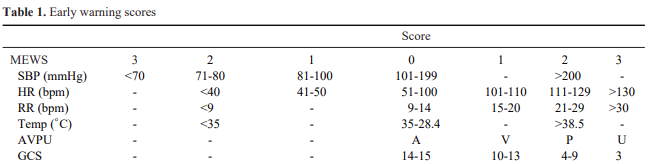

In [ ]:
# SBP
test_df.loc[test_df['SBP'] <= 70, 'SBP_score'] = 3
test_df.loc[(71 <= test_df['SBP'])&(test_df['SBP'] <= 80), 'SBP_score'] = 2
test_df.loc[(81 <= test_df['SBP'])&(test_df['SBP'] <= 100), 'SBP_score'] = 1
test_df.loc[(101 <= test_df['SBP'])&(test_df['SBP'] <= 199), 'SBP_score'] = 0
test_df.loc[test_df['SBP'] >= 200, 'SBP_score'] = 2

# HR
test_df.loc[test_df['HR'] <= 40, 'HR_score'] = 2
test_df.loc[(41 <= test_df['HR'])&(test_df['HR'] <= 50), 'HR_score'] = 1
test_df.loc[(51 <= test_df['HR'])&(test_df['HR'] <= 100), 'HR_score'] = 0
test_df.loc[(101 <= test_df['HR'])&(test_df['HR'] <= 110), 'HR_score'] = 1
test_df.loc[(111 <= test_df['HR'])&(test_df['HR'] <= 129), 'HR_score'] = 2
test_df.loc[test_df['HR'] > 129, 'HR_score'] = 3

# RR
test_df.loc[test_df['RR'] <= 8, 'RR_score'] = 2
test_df.loc[(9 <= test_df['RR'])&(test_df['RR'] <= 14), 'RR_score'] = 0
test_df.loc[(15 <= test_df['RR'])&(test_df['RR'] <= 20), 'RR_score'] = 1
test_df.loc[(21 <= test_df['RR'])&(test_df['RR'] <= 29), 'RR_score'] = 2
test_df.loc[test_df['RR'] > 29, 'RR_score'] = 3

# BT
test_df.loc[test_df['BT'] <= 35, 'BT_score'] = 2
test_df.loc[(35.1 <= test_df['BT'])&(test_df['BT'] <= 36), 'BT_score'] = 1
test_df.loc[(36.1 <= test_df['BT'])&(test_df['BT'] <= 38), 'BT_score'] = 0
test_df.loc[(38.1 <= test_df['BT'])&(test_df['BT'] <= 38.5), 'BT_score'] = 1
test_df.loc[test_df['BT'] >= 38.6, 'BT_score'] = 2

# GCS
test_df.loc[(14 <= test_df['GCS'])&(test_df['GCS'] <= 15), 'GCS_score'] = 0
test_df.loc[(11 <= test_df['GCS'])&(test_df['GCS'] <= 13), 'GCS_score'] = 1
test_df.loc[(6 <= test_df['GCS'])&(test_df['GCS'] <= 10), 'GCS_score'] = 2
test_df.loc[(3 <= test_df['GCS'])&(test_df['GCS'] <= 5), 'GCS_score'] = 3

In [ ]:
# MEWS
test_df['MEWS'] = test_df['SBP_score'] + test_df['HR_score'] + test_df['RR_score'] + test_df['BT_score'] + test_df['GCS_score']
test_df

,pid,SBP,BT,RR,HR,GCS,label,SBP_score,HR_score,RR_score,BT_score,GCS_score,MEWS
0,135089,116.0,37.1,19.0,86.0,14.0,0,0.0,0.0,1.0,0.0,0.0,1.0
1,135089,116.0,37.1,19.0,86.0,14.0,0,0.0,0.0,1.0,0.0,0.0,1.0
2,135089,116.0,38.7,28.0,130.0,14.0,0,0.0,3.0,2.0,2.0,0.0,7.0
3,135089,116.0,38.7,22.0,130.0,14.0,0,0.0,3.0,2.0,2.0,0.0,7.0
4,135089,116.0,38.7,23.0,123.0,14.0,0,0.0,2.0,2.0,2.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29549,135219,134.0,37.6,22.0,59.0,14.0,0,0.0,0.0,2.0,0.0,0.0,2.0
29550,135219,132.0,37.6,22.0,60.0,14.0,0,0.0,0.0,2.0,0.0,0.0,2.0
29551,135219,139.0,37.7,18.0,66.0,14.0,0,0.0,0.0,1.0,0.0,0.0,1.0
29552,135219,139.0,37.7,18.0,66.0,14.0,0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
test_df = test_df[['pid', 'label', 'MEWS']]
test_df

,pid,label,MEWS
0,135089,0,1.0
1,135089,0,1.0
2,135089,0,7.0
3,135089,0,7.0
4,135089,0,6.0
...,...,...,...
29549,135219,0,2.0
29550,135219,0,2.0
29551,135219,0,1.0
29552,135219,0,1.0


In [ ]:
# MEWS_mean
mean_df = test_df.groupby('pid')['MEWS'].agg(**{'mews_mean':'mean'}).reset_index()
mean_df

,pid,mews_mean
0,132551,1.351064
1,132567,1.706667
2,132570,1.152174
3,132582,1.575758
4,132584,2.585106
...,...,...
395,142561,2.204545
396,142573,2.064516
397,142576,3.755556
398,142595,1.088889


In [ ]:
# MEWS_median
median_df = test_df.groupby('pid')['MEWS'].agg(**{'mews_median':'median'}).reset_index()
median_df

,pid,mews_median
0,132551,1.0
1,132567,2.0
2,132570,1.0
3,132582,1.5
4,132584,2.0
...,...,...
395,142561,2.0
396,142573,2.0
397,142576,4.0
398,142595,1.0


In [ ]:
# MEWS_max
max_df = test_df.groupby('pid')['MEWS'].agg(**{'mews_max':'max'}).reset_index()
max_df

,pid,mews_max
0,132551,3.0
1,132567,5.0
2,132570,5.0
3,132582,4.0
4,132584,8.0
...,...,...
395,142561,7.0
396,142573,7.0
397,142576,7.0
398,142595,2.0


In [ ]:
# MEWS_label
label_df = test_df.groupby('pid')['label'].agg(**{'label_mean':'mean'}).reset_index()
label_df

,pid,label_mean
0,132551,1.0
1,132567,0.0
2,132570,0.0
3,132582,0.0
4,132584,0.0
...,...,...
395,142561,0.0
396,142573,0.0
397,142576,0.0
398,142595,0.0


In [ ]:
# final_df 만들기
df1 = pd.merge(label_df, mean_df)
df1

,pid,label_mean,mews_mean
0,132551,1.0,1.351064
1,132567,0.0,1.706667
2,132570,0.0,1.152174
3,132582,0.0,1.575758
4,132584,0.0,2.585106
...,...,...,...
395,142561,0.0,2.204545
396,142573,0.0,2.064516
397,142576,0.0,3.755556
398,142595,0.0,1.088889


In [ ]:
df2 = pd.merge(median_df, max_df)
df2

,pid,mews_median,mews_max
0,132551,1.0,3.0
1,132567,2.0,5.0
2,132570,1.0,5.0
3,132582,1.5,4.0
4,132584,2.0,8.0
...,...,...,...
395,142561,2.0,7.0
396,142573,2.0,7.0
397,142576,4.0,7.0
398,142595,1.0,2.0


In [ ]:
final_df = pd.merge(df1, df2)
final_df

,pid,label_mean,mews_mean,mews_median,mews_max
0,132551,1.0,1.351064,1.0,3.0
1,132567,0.0,1.706667,2.0,5.0
2,132570,0.0,1.152174,1.0,5.0
3,132582,0.0,1.575758,1.5,4.0
4,132584,0.0,2.585106,2.0,8.0
...,...,...,...,...,...
395,142561,0.0,2.204545,2.0,7.0
396,142573,0.0,2.064516,2.0,7.0
397,142576,0.0,3.755556,4.0,7.0
398,142595,0.0,1.088889,1.0,2.0


In [ ]:
final_df.to_csv('/content/drive/MyDrive/최종프로젝트/mews.csv')

In [ ]:
test_y = final_df['label_mean']
mews_mean = final_df['mews_mean']
mews_median = final_df['mews_median']
mews_max = final_df['mews_max']

In [ ]:
# auc(mean)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report, accuracy_score, roc_auc_score, average_precision_score

roc_auc_score(test_y, mews_mean)

0.686450044208665

In [ ]:
# auc(median)
roc_auc_score(test_y, mews_median)

0.6445347038019451

In [ ]:
# auc(max)
roc_auc_score(test_y, mews_max)

0.6152740937223696

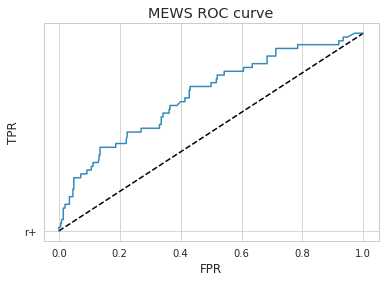

In [ ]:
# ROC_curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, mews_mean)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='MEWS')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('MEWS ROC curve')
plt.show()